<a href="https://colab.research.google.com/github/ASHUTOSH-THAPA/Langgraph/blob/main/QuadraticEquation_Condition_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
!pip install langgraph
!pip install langchain
%pip install -qU langchain-openai

In [41]:
from langchain_openai import ChatOpenAI
from langgraph.graph import StateGraph,START,END
from typing import TypedDict,Literal
from pydantic import BaseModel,Field
from dotenv import load_dotenv
import operator
load_dotenv()

False

In [43]:
model=ChatOpenAI(openai_api_key=key)

In [44]:
class Quadstate(TypedDict):
  a:int
  b:int
  c:int
  equation:str
  discriminant:float
  result:str

In [45]:
def show_equation(state:Quadstate)->Quadstate:
  equation=f'{state["a"]}x2{state["b"]}x{state["c"]}'
  return {'equation':equation}

In [46]:
def cal_discriminant(state:Quadstate)->Quadstate:
  discriminant = state["b"]**2 - (4*state["a"]*state["c"])
  return {'discriminant':discriminant}

In [47]:
def no_real_roots(state:Quadstate)->Quadstate:
  root1 = (-state["b"] + state["discriminant"]**0.5)/(2*state["a"])
  root2 = (-state["b"] - state["discriminant"]**0.5)/(2*state["a"])

  result = f'The roots are {root1} and {root2}'
  return {'result': result}

In [48]:
def real_roots(state:Quadstate)->Quadstate:
  root = (-state["b"])/(2*state["a"])
  result = f'Only repeating root is {root}'
  return {'result': result}


In [49]:
def repeated_roots(state:Quadstate)->Quadstate:
  result = f'No real roots'
  return {'result': result}

In [50]:
def check_condition(state:Quadstate)->Literal["real_roots","no_real_roots","repeated_roots"]:
  if state['discriminant']>0:
    return "real_roots"
  elif state['discriminant']==0:
    return "no_real_roots"
  else:
    return "repeated_roots"

In [51]:
graph=StateGraph(Quadstate)

In [52]:
graph.add_node('show_equation',show_equation)
graph.add_node('cal_discriminant',cal_discriminant)
graph.add_node('no_real_roots',no_real_roots)
graph.add_node('real_roots',real_roots)
graph.add_node('repeated_roots',repeated_roots)


graph.add_edge(START,'show_equation')
graph.add_edge('show_equation','cal_discriminant')

graph.add_conditional_edges('cal_discriminant',check_condition)

graph.add_edge('no_real_roots',END)
graph.add_edge('real_roots',END)
graph.add_edge('repeated_roots',END)


In [53]:
initial_state={'a':4,'b':2,'c':5}

In [54]:
workflow=graph.compile()

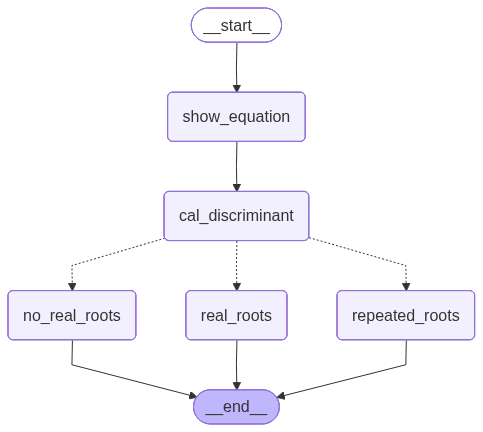

In [56]:
workflow

In [57]:
workflow.invoke(initial_state)

{'a': 4,
 'b': 2,
 'c': 5,
 'equation': '4x22x5',
 'discriminant': -76,
 'result': 'No real roots'}